# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 3 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [3]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [4]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [6]:
data = pd.read_csv("heartdisease.csv")

### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


### Question 1.2 Discuss your data preprocessing strategy. Are there any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

The datafield labeled "sick" is problemmatic because its type is boolean. Since machine learning models require its inputs and outputs to be integers, it's necessary to encode its categorical values true and false to numerical values, in this case 0 and 1. 

In [9]:
incomplete_rows = data[data.isnull().any(axis=1)]
incomplete_rows.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick


It appears that there are no null values in the dataset, so imputation is unnecessary.

As for preprocessing the data, I will perform onehotencoding on the categorical features sex, cp, restecg, thal, and fbs. Sex and fbs are binary features in which both values are meaningful, not where one is the absence of the other. For example, sex is divided into male and female, yet a designation of 'male' wouldn't simply be 'not female' because being male has its own independent implications. For cp, restecg, and thal, which are all limited selection, the numeric values are arbitrary and independent of each other. For example, restecg designates 0 as hypertrophy, 1 as normal, and 2 as wave abnormality. The values assigned have no relative relationship, and if I were to reassign the numbers, the data would still make sense. For the numerical features, I will apply standard scaling to age, trestbps, cholserum, and thalach. 

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

new_y1 = le.fit_transform(data["sick"])
new_y = pd.DataFrame(new_y1, columns=['sick'])
new_x = data.drop(['sick'], axis=1)

### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

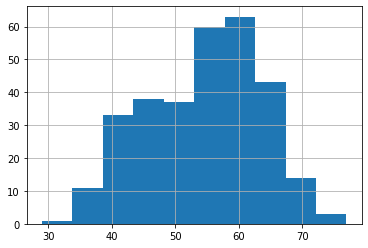

In [11]:
new_x['age'].hist()

Age follows a gradient.

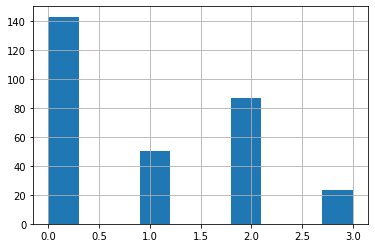

In [12]:
new_x['cp'].hist()

Chest pain type has a limited selection, since it's classified only 4 different ways.

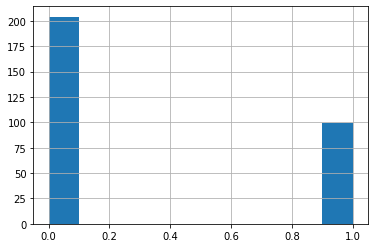

In [13]:
new_x['exang'].hist()

Exercise induced angina is binary, with 0 as none and 1 as present. 

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

(array([165.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 138.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

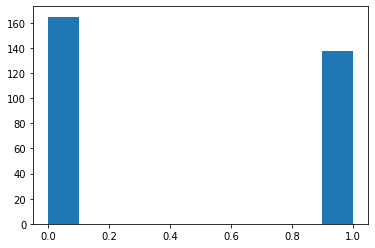

In [14]:
plt.hist(new_y1)

There are 165 healthy individuals and 138 sick individuals.

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

Artificially balancing a dataset either entails increasing the number of minority class members in the training set or reducing the number of majority class members. Increasing the number of samples from the minority class to balance a dataset ironically makes the model prone to overfitting. Removing data from the majority class, however, increases the possibility of discarding useful or critical information.  

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [15]:
corr_matrix = data.corr()
corr_matrix["sick"].sort_values(ascending=False)

sick        1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: sick, dtype: float64

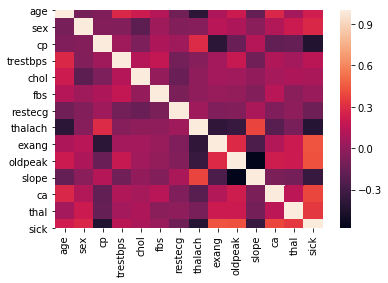

In [16]:
import seaborn as sns
sns.heatmap(corr_matrix, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns)

In [17]:
print("Correlation between age and resting blood pressure (trestbps):\n", corr_matrix.loc['age', 'trestbps'])
print("Correlation between age and cholesterol (chol):\n", corr_matrix.loc['age', 'chol'])
print("Correlation between age and maximum heart rate achieved (thalach):\n", corr_matrix.loc['age', 'thal'])
print("Correlation between age and disease (sick):\n", corr_matrix.loc['age', 'sick'])
print("Correlation between resting blood pressure (trestbps) and disease (sick):\n", corr_matrix.loc['trestbps', 'sick'])
print("Correlation between cholesterol (chol) and disease (sick):\n", corr_matrix.loc['chol', 'sick'])
print("Correlation between maximum heart rate (thalach) and disease (sick):\n", corr_matrix.loc['thal', 'sick'])

Correlation between age and resting blood pressure (trestbps):
 0.27935090656128847
Correlation between age and cholesterol (chol):
 0.21367795655956176
Correlation between age and maximum heart rate achieved (thalach):
 0.06800137705465183
Correlation between age and disease (sick):
 0.22543871587483694
Correlation between resting blood pressure (trestbps) and disease (sick):
 0.14493112849775133
Correlation between cholesterol (chol) and disease (sick):
 0.0852391051375688
Correlation between maximum heart rate (thalach) and disease (sick):
 0.3440292680383096


Age, cholesterol, resting blood pressure, and maximum heart rate are all positively correlated with disease ('sick'). It makes sense that older people are more likely to have heart disease based on biology. Cholesterol clogs arteries, so restricts blood flow through the heart, so the positive correlation between cholesterol levels and heart disease also makes sense. Some variables correlate more highly than others because there's a clear biological cause-and-effect underneath. Correlation does not equal causation, but causation can lead to a clearcut correlation. 

## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [18]:
new_x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
new_y.head()

,sick
0,0
1,0
2,0
3,0
4,0


I already saved the 'sick' column as a separate array and dropped it from the dataframe in Question 1.3.

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [20]:
training_set1, testing_set1, training_labels1, testing_labels1 = train_test_split(new_x, new_y, test_size = 0.3, random_state = 42)
def output_shapes(training_set, testing_set, training_labels, testing_labels):
    print("Shape of training set:", training_set.shape)
    print("Shape of training labels:", training_labels.shape)
    print("Shape of testing set:", testing_set.shape)
    print("Shape of testing labels:", testing_labels.shape)
output_shapes(training_set1, testing_set1, training_labels1, testing_labels1)

Shape of training set: (212, 13)
Shape of training labels: (212, 1)
Shape of testing set: (91, 13)
Shape of testing labels: (91, 1)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num_pipeline = Pipeline([('std_scaler', StandardScaler())])
categorical_features = ["sex", "cp", "restecg", "thal", "fbs"]
data_num = new_x[["age", "trestbps", "chol", "thalach"]]
numerical_features = list(data_num)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, numerical_features),
    ("cat", OneHotEncoder(), categorical_features)
])
data_prepared = full_pipeline.fit_transform(new_x)

### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [22]:
training_set2, testing_set2, training_labels2, testing_labels2 = train_test_split(data_prepared, new_y, test_size = 0.3, random_state = 42)
output_shapes(training_set2, testing_set2, training_labels2, testing_labels2)

Shape of training set: (212, 19)
Shape of training labels: (212, 1)
Shape of testing set: (91, 19)
Shape of testing labels: (91, 1)


The processed data has 19 features as opposed to the raw data's 13 features because I applied one hot encoding to five features. Furthermore, the columns in the processed data are out of order from the raw data, putting the numerical data first and the categorical data after. Finally, the numerical data is all scaled.

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [23]:
# SVM
svm_classifier_raw = SVC(probability = True)
svm_classifier_raw.fit(training_set1, training_labels1.values.ravel())
predicted_labels1 = svm_classifier_raw.predict(testing_set1)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy:  0.7032967032967034
Precison:  0.7916666666666666
Recall:  0.4634146341463415
F1 Score:  0.5846153846153846
Confusion matrix: 
 [[45  5]
 [22 19]]


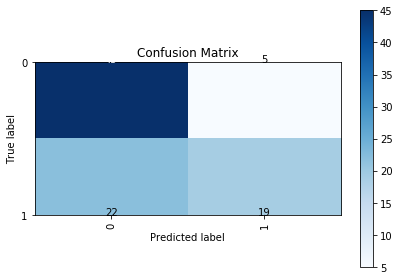

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_scores(testing_labels, predicted_labels):
    accuracy = accuracy_score(testing_labels, predicted_labels)
    print("Accuracy: ", accuracy)
    precision = precision_score(testing_labels, predicted_labels)
    print("Precison: ", precision)
    recall = recall_score(testing_labels, predicted_labels)
    print("Recall: ", recall)
    f1 = f1_score(testing_labels, predicted_labels)
    print("F1 Score: ", f1)
    c_matrix = confusion_matrix(testing_labels, predicted_labels)
    print("Confusion matrix: \n", c_matrix)
    draw_confusion_matrix(testing_labels, predicted_labels, [0, 1])
print_scores(testing_labels1, predicted_labels1)

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

- Accuracy reports the fraction of correctly classified labels. 
- Precision reports the ability of the classifier not to label as positive (1 = True = Sick) a sample that is negative (0 = False = Not sick). It's calculated as the ratio of the number of true positives to the total number of positives. <br>Formula: tp / (tp + fp) where tp = true positives, fp = false positives
- Recall reports the ability of the classifier to find all the positive samples. It's calculated as the ratio of the number of true positives to the number of true positives and false negatives. <br>Formula: tp / (tp + fn) where fn = false negatives
- The F1 score is the weighted average of the precision and recall. <br>Formula: 2 * (precision * recall) / (precision + recall)
- The confusion matrix evaluates the accuracy of a classification. The element in the ith row and jth column is the number of observations known to be in group i and predicted to be in group j. Thus, (0, 0) is the count of true negatives, (1, 0) is the number of false negatives, (1, 1) is the number of true positives, and (0, 1) is the number of false positives.

We would probably value the recall score over precision in this study because we would want our model to have as few as false negatives as possible. Here, A false negative is more serious than a false positive because sick people that don't receive treatment are much more likely to die than healthy people mistakenly receiving treatment. A good model to predict disease should have a recall score close to 1. 

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

[0.  0.1 1. ]
[0.         0.46341463 1.        ]


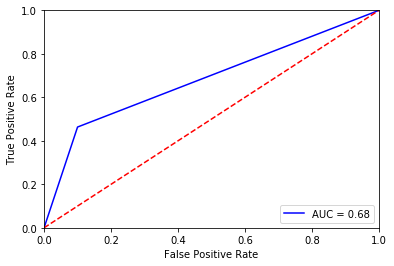

In [26]:
from sklearn.metrics import roc_curve, auc
def graph_roc_curve(testing_labels, predicted_labels):
    fpr, tpr, thresholds = roc_curve(testing_labels, predicted_labels, pos_label=1)
    print(fpr)
    print(tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
graph_roc_curve(testing_labels1, predicted_labels1)

In [37]:
fpr, tpr, thresholds = roc_curve(testing_labels1, predicted_labels1, pos_label=1)
tpr

array([0.        , 0.46341463, 1.        ])

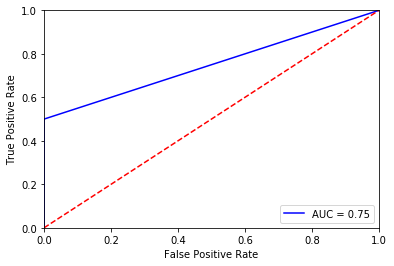

In [38]:
tpr = np.array([0., 0.5, 1. ])
fpr = np.array([0., 0., 1.        ])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The ROC curve is a probability curve that tells how capable the model is at correctly classifying the data points into different classes. The curve is plotted with the true positive rate on the y-axis against the false positive rate on the x-axis. The higher the area under the curve to 1, the better the model is at distinguishing between patients with disease and no disease. Thus, since the AUC of this model is 0.79, which is closer to 1, this model has fair accuracy. 

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [24]:
svm_classifier_processed = SVC(probability = True)
svm_classifier_processed.fit(training_set2, training_labels2.values.ravel())
predicted_labels2 = svm_classifier_processed.predict(testing_set2)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy:  0.8021978021978022
Precison:  0.7674418604651163
Recall:  0.8048780487804879
F1 Score:  0.7857142857142858
Confusion matrix: 
 [[40 10]
 [ 8 33]]


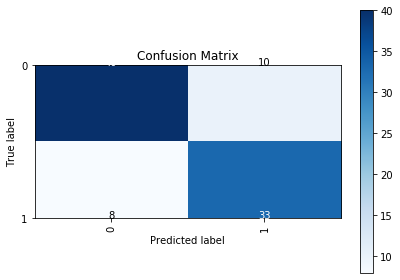

In [25]:
print_scores(testing_labels2, predicted_labels2)

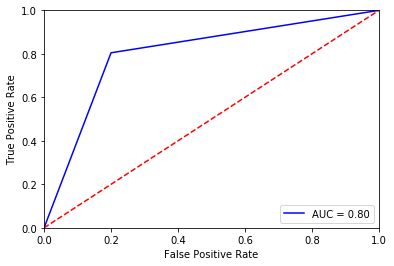

In [26]:
graph_roc_curve(testing_labels2, predicted_labels2)

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

Using the processed data did dramatically increase the performance of the model. Accuracy increased from 70% to 80%, while the recall score jumped from 0.46 to 0.80. The F1 score jumped as well from 0.58 to 0.78. The ROC curve moved more towards the top left corner of the plot, which is ideal since the very top left corner is a false positive rate of 0 and a true positive rate of 1. The AUC of the ROC curve increased from 0.68 to 0.80. <br>
I think using the processed data had such a big impact because there were so many categorical variables and one hot encoding the necessary categorical variables meant that the model could assign weights to more choices within each categorical variable instead of assigning one weight to each categorical variable. Without one hot encoding, the model assumes there's a natural ordering between the categories when in actuality there is no relative relationship. In this case, each category should get its own feature.

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [27]:
# SVM
svm_classifier_kernel = SVC(kernel='linear', probability = True)
svm_classifier_kernel.fit(training_set2, training_labels2.values.ravel())
predicted_labels3 = svm_classifier_kernel.predict(testing_set2)

Accuracy:  0.8021978021978022
Precison:  0.7674418604651163
Recall:  0.8048780487804879
F1 Score:  0.7857142857142858
Confusion matrix: 
 [[40 10]
 [ 8 33]]


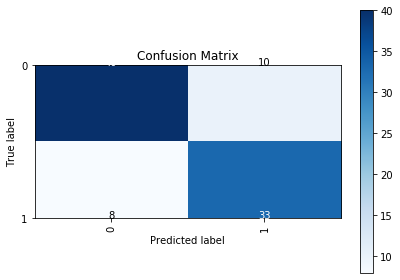

In [28]:
print_scores(testing_labels2, predicted_labels3)

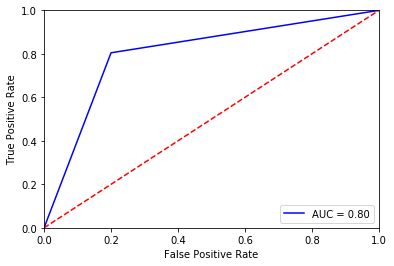

In [29]:
graph_roc_curve(testing_labels2, predicted_labels3)

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

Surprisingly, the SVM model with a linear kernel performed largely the same with only minute differences. It may be because the processed data is now perfectly linearly separable or it is parsed so that the 'rbf' kernel is unable to improve on the linear separation achieved.

Changing the input parameter from 'rbf' to 'linear' could be expected to worsen performance because the linear kernel operates in a linear feature space that assumes datasets are linearly separated. However, when the dataset is not linearly separable, the linear kernel will not perform well. The 'rbf' kernel, on the other hand, is a non-linear transformation that maps from a nonlinear to a new feature space in which the samples become linearly separated, so nonlinearly separable datasets can be transformed in this way.

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [30]:
# Logistic Regression
log_regression_classifier = LogisticRegression(solver='sag', max_iter=10)
log_regression_classifier.fit(training_set2, training_labels2.values.ravel())
predicted_labels_log = log_regression_classifier.predict(testing_set2)

/Users/fitlab/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Accuracy:  0.8461538461538461
Precison:  0.813953488372093
Recall:  0.8536585365853658
F1 Score:  0.8333333333333333
Confusion matrix: 
 [[42  8]
 [ 6 35]]


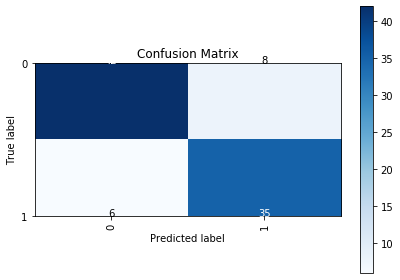

In [31]:
print_scores(testing_labels2, predicted_labels_log)

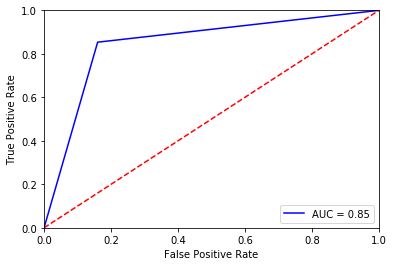

In [32]:
graph_roc_curve(testing_labels2, predicted_labels_log)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [33]:
# Logistic Regression
log_regression_classifier2 = LogisticRegression(solver='sag', max_iter=1000)
log_regression_classifier2.fit(training_set2, training_labels2.values.ravel())
predicted_labels_log2 = log_regression_classifier2.predict(testing_set2)

Accuracy:  0.8351648351648352
Precison:  0.8095238095238095
Recall:  0.8292682926829268
F1 Score:  0.8192771084337348
Confusion matrix: 
 [[42  8]
 [ 7 34]]


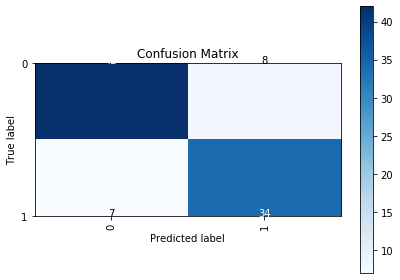

In [34]:
print_scores(testing_labels2, predicted_labels_log2)

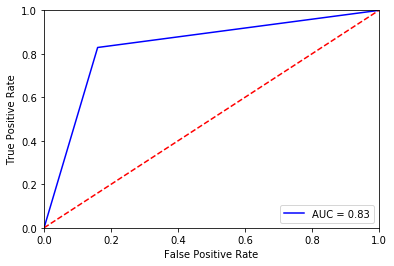

In [35]:
graph_roc_curve(testing_labels2, predicted_labels_log2)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

The convergence warning said that the max iterations (max_iter) was reached, so I simply increased the parameter max_iter to 1000. This led to an improved outcome because logistic regression uses maximum likelihood, an iterative procedure, where the log likelihood increases at each iteration. Since the goal is to maximize the log likelihood, increasing the number of iterations means incrementing the log likelihood more until the difference becomes very small, at which point the model has converged. Limiting the number of iterations means that the max log likelihood returned will probably be less than the real max log likelihood.

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [36]:
# Logistic Regression
log_regression_classifier3 = LogisticRegression(solver='sag', penalty='none', max_iter=10000)
log_regression_classifier3.fit(training_set2, training_labels2.values.ravel())
predicted_labels_log3 = log_regression_classifier3.predict(testing_set2)

Accuracy:  0.8131868131868132
Precison:  0.7727272727272727
Recall:  0.8292682926829268
F1 Score:  0.7999999999999999
Confusion matrix: 
 [[40 10]
 [ 7 34]]


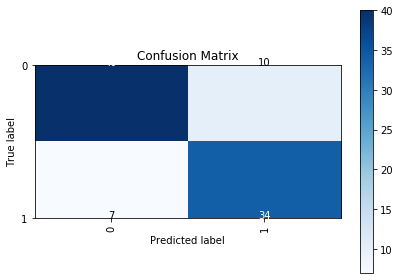

In [37]:
print_scores(testing_labels2, predicted_labels_log3)

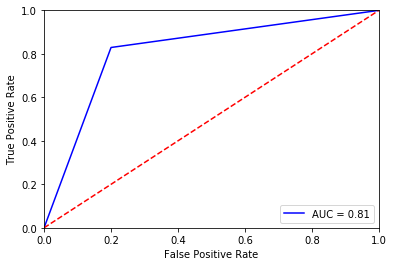

In [38]:
graph_roc_curve(testing_labels2, predicted_labels_log3)

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

The penalty parameter is the type of regularization applied to the model. The default parameter is penalty='l2', which means that the model undergoes L2 regularization. In general, regularization adds a term, the "penalty", to the cost function, which  penalizes all the parameters except the intercept so that the model generalizes the data and won't overfit. Since the goal of the cost function is to be minimized as much as possible, adding a constant C to it has this effect. Adding a penalty decreases the importance given to higher terms and brings the model towards a less complex equation. Overall, the penalty parameter adds bias to reduce overfitting. However, it's possible that increasing the bias results in too much bias that then leads to underfitting, so the model's performance is lower than it should be. Setting the penalty to 'none' brings the bias back down so that the model will no longer underfit as much, producing a more optimal outcome. <br>
The solver method, 'sag', is the algorithm used to optimize the cost function. SAG stands for stochastic average gradient, and the method optimizes the sum  of a finite number of smooth convex functions. By incorporating the memory of previous gradients, SAG achieves a fast convergance rate. 

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

A linear SVM finds the linear decision boundary by finding a "maximum-margin hyperplane" that divides the samples into two classes so that the distance between the hyperplane and the nearest point from either group is maximized. It attempts to minimize the average of the sum of the hinge loss function for each point, in which it's 0 if the point lies on the correct side and proportional to the distance from the current margin. <br>
Logistic regression finds the linear decision boundary by maximizing the log likelihood function, which is derived from multiplying conditional probabilities. The sigmoid function maps predicted values to probabilities, and we designate a threshold, usually 0.5, above which the point is classified into class 1 and below which it's classified into class 2. So, the decision boundary will be the set of all points x where P(y = 1 | x) = P(y = 1 | x) = 0.5.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [39]:
# k-Nearest Neighbors algorithm
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(training_set2, training_labels2.values.ravel())
predicted_labels_knn = KNN_classifier.predict(testing_set2)
accuracy_knn = accuracy_score(testing_labels2, predicted_labels_knn)
print("Accuracy: ", accuracy_knn)

Accuracy:  0.7692307692307693


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [40]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, adjusted_mutual_info_score
def report_knn_score(predicted_labels_knn):
    h_score = homogeneity_score(testing_labels2.values.ravel(), predicted_labels_knn)
    print("Homogeneity Score: ", h_score)
    c_score = completeness_score(testing_labels2.values.ravel(), predicted_labels_knn)
    print("Completeness Score: ", c_score)
    vm_score = v_measure_score(testing_labels2.values.ravel(), predicted_labels_knn)
    print("V-Measure Score: ", vm_score)
    adj_rand_score = adjusted_rand_score(testing_labels2.values.ravel(), predicted_labels_knn)
    print("Adjusted Rand Score: ", adj_rand_score)
    adj_mutual_info_score = adjusted_mutual_info_score(testing_labels2.values.ravel(), predicted_labels_knn)
    print("Adjusted Mutual Information: ", adj_mutual_info_score)
report_knn_score(predicted_labels_knn)

Homogeneity Score:  0.2184953645077252
Completeness Score:  0.2178820916009849
V-Measure Score:  0.21818829711589469
Adjusted Rand Score:  0.282046786555127
Adjusted Mutual Information:  0.21179662713765635


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

The homogeneity score checks how homogeneous the result is, where each cluster contains only members of a single class. It's bounded by 0 and 1, with 1 indicating perfect homogeneity. Since the homogeneity score of this particular model is only 0.21, we can conclude it has low homogeneity, meaning that each cluster has a mix of members belonging to each class. <br>
The completeness score is a measure of how well the model assigned all samples with same true label to the same cluster. In other words, all members of a given class are assigned to the same cluster. Since the completeness score of this model is low as well, the members of each class are likely split between different clusters. <br>
The v-measure score is the harmonic mean of the homogeneity score and the completeness score. It's used to evaluate the performance of the overall model. Since the v-measure score is low as well, we can conclude that this particular model doesn't perform very well. <br>
The adjusted rand score is the rand index adjusted for chance. The rand index is a similarity measure between two clusterings. An adjusted rand score close to 0 shows random labeling independent of the number of clusters and samples, and 1 for when the clusterings are identical. Since the adjusted rand score is low, it indicates a bad clustering. <br>
Adjusted mutual information is the adjusted measure of the agreement of the two assignments (predicted and true labels) for the same data that accounts for chance and the fact that the mutual information is higher for two clusterings with a larger number of clusters. <br>

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [41]:
n_values = [1, 2, 3, 5, 10, 20, 50, 100]
for i in n_values:
    KNN_classifier_loop = KNeighborsClassifier(n_neighbors=i)
    KNN_classifier_loop.fit(training_set2, training_labels2.values.ravel())
    predicted_labels_knn_loop = KNN_classifier_loop.predict(testing_set2)
    accuracy_knn_loop = accuracy_score(testing_labels2, predicted_labels_knn_loop)
    print("n =", i, ": ")
    print("Accuracy: ", accuracy_knn_loop)
    report_knn_score(predicted_labels_knn_loop)

n = 1 : 
Accuracy:  0.6263736263736264
Homogeneity Score:  0.05080438623742115
Completeness Score:  0.05066178845877639
V-Measure Score:  0.050732987146595486
Adjusted Rand Score:  0.05347392676451433
Adjusted Mutual Information:  0.04297229304978876
n = 2 : 
Accuracy:  0.7142857142857143
Homogeneity Score:  0.13407101941001548
Completeness Score:  0.14743310213032995
V-Measure Score:  0.14043493352235917
Adjusted Rand Score:  0.1747259640151877
Adjusted Mutual Information:  0.1330347784285982
n = 3 : 
Accuracy:  0.7582417582417582
Homogeneity Score:  0.20501426205581044
Completeness Score:  0.20358308745098672
V-Measure Score:  0.20429616829960984
Adjusted Rand Score:  0.25859811077715755
Adjusted Mutual Information:  0.1978056028237537
n = 5 : 
Accuracy:  0.7692307692307693
Homogeneity Score:  0.2184953645077252
Completeness Score:  0.2178820916009849
V-Measure Score:  0.21818829711589469
Adjusted Rand Score:  0.282046786555127
Adjusted Mutual Information:  0.21179662713765635
n = 10

n = 10 produces the best accuracy at 82.4% and the best v-measure at 0.328.

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

It's interesting to note that the KNN algorithm is a classification algorithm, but its methodology predicates itself on the data being separable into clusters. Clustering algorithms group data points into clusters where points in the same cluster are more similar to each other than to those in other groups. Clustering algorithms are most effective on data like racial demographics where the dataset can be partitioned effectively without introducing bias and each group has identifying characteristics. Furthermore, these identifying characteristics should be mutually exclusive so that members can't fit into two or more groups. For example, clustering is particularly useful in behavioral analysis on communities because communities are easily separated into groups on age (children, adolescents, adults, and seniors), sex (male, female), race (black, Asian, white, etc.), and income level. <br>
For the results of the KNN algorithm, classifying on too few neighbors can result in missing crucial information, while classifying on too many neighbors results in too much noise where points that are clearly unrelated to the point in question are involved in the classification. We can see this in the trend of accuracy and the 5 scores as we increase n. From the lowest n = 1, as n increased, the accuracy and the scores increased, yet after a certain point (n = 10), the accuracy and the scores began decreasing again.